In [6]:
import json, glob
import numpy as np
import xnetwork as xnet
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import MaxNLocator

In [7]:
# files = glob.glob('subset_chu/citation_net_*_bardo.xnet')
# files = glob.glob('subset_chu/citation_net_*voting_schema.xnet')
# papers_pub = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))
# for file in files:
#     net = xnet.xnet2igraph(file)
#     net.vs['cluster_name'] = net.vs['Cluster Name']
#     for field in set(net.vs['Cluster Name']):
#         vtxs = net.vs.select(cluster_name_eq = field)
#         years = vtxs['year']
#         unique, count = np.unique(years, return_counts=True)
#         for u,c in zip(unique, count):
#             papers_pub[file[24:-18].lower()][field][u] += c
            

In [28]:


# files = glob.glob('subset_chu/citation_net_*_bardo.xnet')
files = glob.glob('subset_chu/citation_net_*voting_schema.xnet')

# files = ['subset_chu/citation_net_nat. mater._011122_voting_schema_bardo_infomap_01112022.xnet']
papers_pub = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: [])))
for file in files:
    net = xnet.xnet2igraph(file)
    net.vs['cluster_name'] = net.vs['Cluster Name']
    for field in set(net.vs['Cluster Name']):
        vtxs = net.vs.select(cluster_name_eq = field)
        for v in vtxs:
            papers_pub[file[24:-18].lower()][field]["%d" % v['year']].append(v['wos_id'])

json_str = json.dumps(papers_pub)
# out = open('bardo_paper_per_year_310522.json', 'w')

out = open('bardo_paper_per_year_040123_nat_mat.json', 'w')
out.write(json_str)
out.close()

In [8]:
def format_title_journal(name1):
    print(name1)
    name = name1.title()
    name = name.replace('Mater', 'Mat')
    name = name.replace('Acs', 'ACS')
    name = name.replace('Appl. Mat. Interfaces', 'AMI')
    return name

In [44]:
n_comm = 9
files = glob.glob('impact_factor/impact_factor_dist_*010622_IFv2.json')
files2 = glob.glob('impact_factor_dist_*_231222.json')
print(files)
cmap = plt.get_cmap("tab10")
outer_colors = cmap(np.arange(10))
outer_colors[-1][0] = 0.73
outer_colors[-1][1] = 0.73
outer_colors[-1][2] = 0.73
outer_colors[-1][3] = 1.0
print(outer_colors)

['impact_factor/impact_factor_dist_ACS Appl. Mater. Interfaces_010622_IFv2.json', 'impact_factor/impact_factor_dist_ACS Nano_010622_IFv2.json', 'impact_factor/impact_factor_dist_Adv. Funct. Mater._010622_IFv2.json', 'impact_factor/impact_factor_dist_Adv. Mater._010622_IFv2.json', 'impact_factor/impact_factor_dist_Chem. Mat._010622_IFv2.json', 'impact_factor/impact_factor_dist_J. Am. Chem. Soc._010622_IFv2.json', 'impact_factor/impact_factor_dist_J. Mat. Chem. B_010622_IFv2.json', 'impact_factor/impact_factor_dist_J. Mater. Chem. A_010622_IFv2.json', 'impact_factor/impact_factor_dist_J. Mater. Chem. C_010622_IFv2.json', 'impact_factor/impact_factor_dist_J. Mater. Chem._010622_IFv2.json', 'impact_factor/impact_factor_dist_Langmuir_010622_IFv2.json', 'impact_factor/impact_factor_dist_Macromolecules_010622_IFv2.json', 'impact_factor/impact_factor_dist_Nano Lett._010622_IFv2.json', 'impact_factor/impact_factor_dist_Nat. Mater._010622_IFv2.json', 'impact_factor/impact_factor_dist_Nat. Nanote

In [61]:
output_json = dict()
# for file in files + files2:
for file in files[:4]:
    
    journal = format_title_journal(file[33:-17])
    if '0622' in journal:
        journal = 'Nat. Mat.'
        
    min_global = 6666
    max_global = 0
    cits_bardo = json.loads(open(file).read())
    H = []
    for field, impact_per_year in cits_bardo.items():
        min_year = min(impact_per_year.keys())
        print(min_year)
        if int(min_year) < int(min_global):
            min_global = min_year
    min_global = int(min_global)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        IF = []
        for y in range(int(min_global), maxyear+1):
            if str(y) in impact_per_year:
                IF.append(impact_per_year[str(y)])
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
        
        
        last_if.append(IF[-1])
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    
    output_json[journal] = dict()
    i = 1
        
    
    for label, IF in zip(labels, H):
        if 'Others' in label:
            label = 'Other'
        output_json[journal][label] = {'x': list(range(int(min_global), maxyear+1)), 'y': IF, 'c':list(outer_colors[i-1]), 'ratio':ratio}
        i += 1


# json_str = json.dumps(output_json)
# out = open('impact_factor_data_to_plot.json', 'w')
# out.write(json_str)
# out.close()

ACS Appl. Mater. Interfaces
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
ACS Nano
2008
2008
2008
2008
2008
2008
2008
2009
2009
2008
Adv. Funct. Mater.
2002
2002
2002
2002
2002
2002
2002
2005
2006
2002
Adv. Mater.
1997
1997
1997
1997
1997
1997
1997
1997
1998
1997


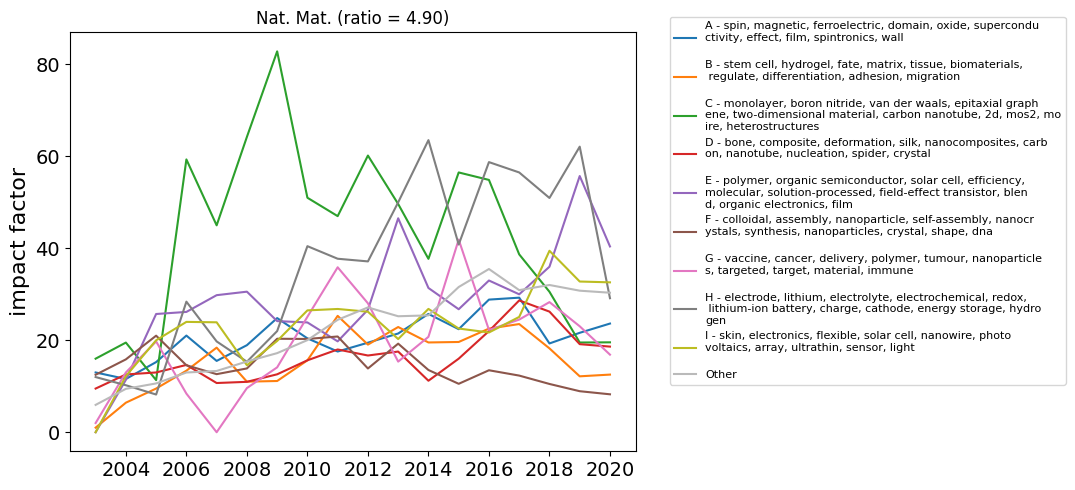

In [37]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
maxyear = 2020
for file in files:

    min_global = 6666
    max_global = 0
    cits_bardo = json.loads(open(file).read())
    H = []
    for field, impact_per_year in cits_bardo.items():
        min_year = min(impact_per_year.keys())
        if int(min_year) < int(min_global):
            min_global = min_year
    min_global = int(min_global)
    i = 0
    labels = []
    sorted_keys = sorted(cits_bardo.keys())
    fg = plt.figure(figsize=(11, 5))
    ax = fg.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    last_if = []
    for field in sorted_keys:
        if i > n_comm:
            break
        i += 1
        impact_per_year = cits_bardo[field]
        IF = []
        for y in range(int(min_global), maxyear+1):
            if str(y) in impact_per_year:
                IF.append(impact_per_year[str(y)])
            else:
                IF.append(0)
        H.append(IF)
        label = field
        label = label[:60] + '\n' + label[60:120] + '\n' + label[120:]
        labels.append(label)
        
        
        last_if.append(IF[-1])
    
#     nat mater
#     labels = labels[:4] + [labels[-2], labels[4], labels[-3], labels[5], labels[6], labels[-1]]
#     H = H[:4] + [H[-2], H[4], H[-3], H[5], H[6], H[-1]]
    
    i = 1
    for label, IF in zip(labels, H):
        if 'Others' in label:
            label = 'Other'
        plt.plot(list(range(int(min_global), maxyear+1)), IF, label=label, color=outer_colors[i-1])
        i += 1
        
    ratio = 0
    if min(last_if) > 0:
        ratio = max(last_if)/min(last_if)
    plt.title("Nat. Mat. (ratio = %.2f)" % ratio)
#     plt.title(format_title_journal(file[33:-17]) + " (ratio = %.2f)" % ratio)
    plt.legend(prop={'size': 8}, bbox_to_anchor=(1.05,1.05))
    plt.ylabel('impact factor', fontsize=16)
    
    plt.tight_layout()
    
    plt.savefig('outputs/' + file[len('impact_factor/'):].replace('.json', '_impact_factor_080622.pdf'))